<a href="https://colab.research.google.com/github/Shanupk17/GenAi-/blob/main/GenAi_1st_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [10]:
# Load the dataset
df= pd.read_csv('/content/movie_dataset.csv')

# Display the first few rows of the dataset
print(df.head())



   S. No                Movie Name    IMDB ID  Song Review  Trailer Response   \
0      1  The Shawshank Redemption  tt0111161          NaN                  0   
1      2             The Godfather  tt0068646          NaN                  2   
2      3           The Dark Knight  tt0071562          NaN                  2   
3      4    The Godfather: Part II  tt0468569          7.0                  2   
4      5              12 Angry Men  tt0050083          NaN                  1   

   YouTube Review  IMDB Rating     Genre  Budget(crores)  BO Revenue   \
0               2          8.6  Thirller            30.0          300   
1               1          5.4     Crime            50.0          300   
2               2          7.9    Action            15.0          300   
3               2          9.0     Crime           270.0          300   
4               2          4.5   Mystery            88.0           17   

  Blockbuster  
0         Yes  
1         Yes  
2         Yes  
3         

In [18]:
# Display columns
print(df.columns)

# Display basic statistics
print(df.describe())


Index(['S. No', 'Movie Name', 'Trailer Response ', 'IMDB Rating', 'Genre',
       'Budget(crores)', 'BO Revenue ', 'Blockbuster'],
      dtype='object')
          S. No  Trailer Response   IMDB Rating  Budget(crores)  BO Revenue   \
count  50.00000           50.00000    50.000000        50.00000    50.000000   
mean   25.50000            1.68000     7.170000        82.08780   166.560000   
std    14.57738            0.62073     2.113924       107.00964    99.387134   
min     1.00000            0.00000     1.900000         4.00000     4.000000   
25%    13.25000            2.00000     5.850000        34.25000    90.000000   
50%    25.50000            2.00000     8.500000        55.50000   155.000000   
75%    37.75000            2.00000     8.600000        96.75000   237.500000   
max    50.00000            2.00000    10.000000       600.00000   400.000000   

       Blockbuster  
count    48.000000  
mean      0.541667  
std       0.503534  
min       0.000000  
25%       0.000000  


In [12]:
# Example: Drop columns that are not needed for testing
df = df.drop(['IMDB ID', 'Song Review', 'YouTube Review'], axis=1)

# Example: Fill missing values
df['Budget(crores)'].fillna(df['Budget(crores)'].mean(), inplace=True)

# Example: Convert 'Blockbuster' column to numeric (if needed)
df['Blockbuster'] = df['Blockbuster'].map({'Yes': 1, 'No': 0})




Genre
Action                  8.350000
Adventure               7.475000
Crime                   7.030000
Fantasy -Fiction        7.650000
Historical - Fiction    3.875000
Mystery                 6.666667
Science-Fiction         8.650000
Suspense                6.660000
Thirller                8.600000
science -Fiction        8.600000
Name: IMDB Rating, dtype: float64


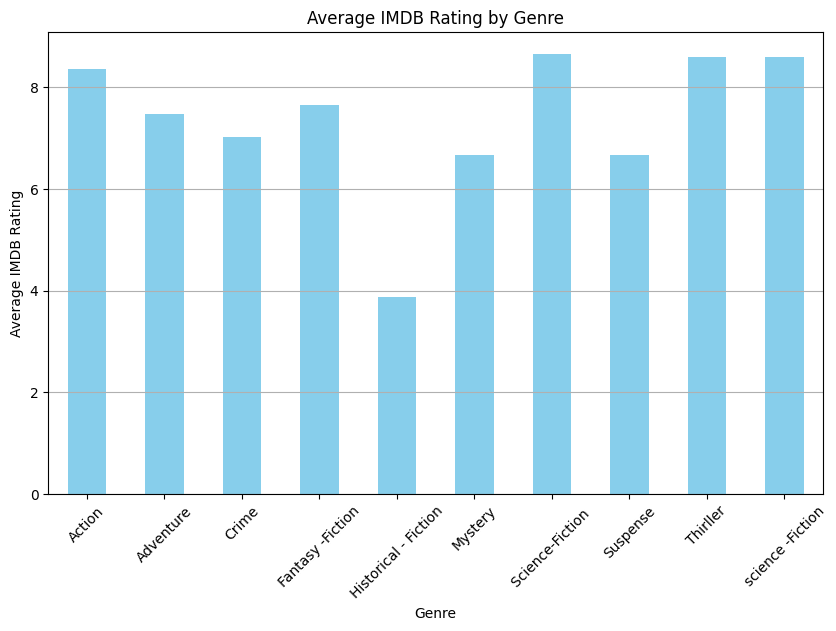

In [13]:
# Example: Group by 'Genre' and calculate average 'IMDB Rating'
avg_rating_by_genre = df.groupby('Genre')['IMDB Rating'].mean()
print(avg_rating_by_genre)

# Example: Plotting average IMDB Rating by Genre
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [14]:
X = df.drop(['Movie Name', 'IMDB Rating'], axis=1)  # Features
y = df['IMDB Rating']  # Target variable

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:

# Example: Recommend movies with high IMDB ratings and are blockbusters
high_rating_threshold = 7.5  # Adjust as needed
minimum_recommendations = 10

# Filter movies based on criteria
recommended_movies = df[(df['IMDB Rating'] >= high_rating_threshold) & (df['Blockbuster'] == 1)]

# If not enough movies meet criteria, relax the threshold
while len(recommended_movies) < minimum_recommendations:
    high_rating_threshold -= 0.1  # Reduce threshold incrementally
    recommended_movies = df[(df['IMDB Rating'] >= high_rating_threshold) & (df['Blockbuster'] == 1)]
    if high_rating_threshold < 5.0:  # Ensure not to go too low
        break

# Sort recommended movies by IMDB rating descending
recommended_movies = recommended_movies.sort_values(by='IMDB Rating', ascending=False)

# Display recommended movies with movie names, IMDB ratings, and genres
if recommended_movies.empty:
    print("Not enough movies found that meet the criteria.")
else:
    print("Recommended Movies:")
    print(recommended_movies[['Movie Name', 'IMDB Rating', 'Genre']].head(minimum_recommendations))


Recommended Movies:
                                        Movie Name  IMDB Rating  \
49                  Transformers Rise of the Beast          9.9   
6                                     Pulp Fiction          8.9   
8                                        Inception          8.8   
11                                    Forrest Gump          8.8   
14                                      The Matrix          8.7   
16  Star Wars: Episode V - The Empire Strikes Back          8.7   
28                        The Silence of the Lambs          8.6   
29                                       Star Wars          8.6   
0                         The Shawshank Redemption          8.6   
24                             Saving Private Ryan          8.6   

               Genre  
49  Science-Fiction   
6           Suspense  
8          Adventure  
11         Adventure  
14  Science-Fiction   
16         Adventure  
28  Fantasy -Fiction  
29  Science-Fiction   
0           Thirller  
24  Fantasy 